# Exposys Data Labs Data Science Project

In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies
are given along with the profit earned. The target is to prepare an ML model which can predict
the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing
Spend are given.

i) Construct Different Regression algorithms

ii) Divide the data into train set and test set

iii) Calculate different regression metrics

iv) Choose the best model

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Import Dataset with pandas

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
# Some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#check if there are any missing values in the data
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

**There are no missing values**

The data consists of 50 entries with 4 different fields - R&D Spend, Administration, Marketing Spend, and Profit

## Exploratory Data Analysis (EDA)

#### Pairplot of the data

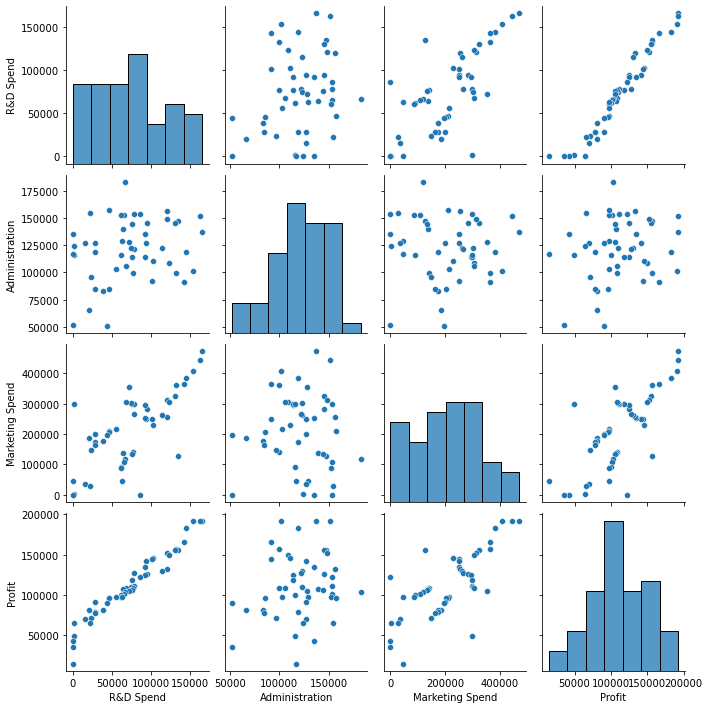

In [8]:
sns.pairplot(df)

#### Heatmap

<AxesSubplot:>

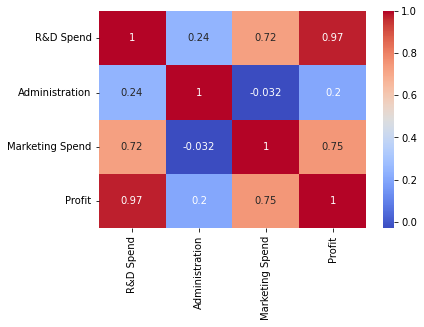

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### From the Heatmap and the Pairplot, we can see that there is high correlation between the 'R&D Spend' and 'Profit' features

#### Distribution Plot of the 'Profit' feature

<AxesSubplot:xlabel='Profit', ylabel='Density'>

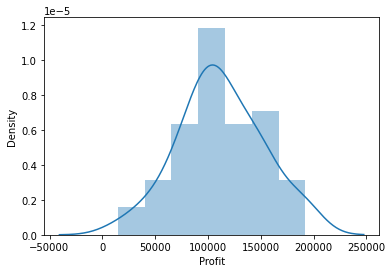

In [10]:
sns.distplot(df['Profit'])

The average profit (which is 100k) is the most frequent

#### Distribution Plot of the 'R&D Spend' feature

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

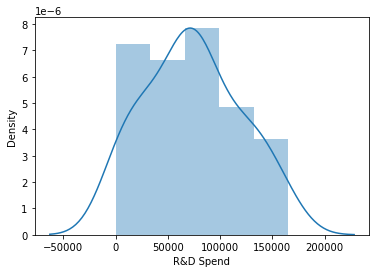

In [11]:
sns.distplot(df['R&D Spend'])

## Splitting data into Train and Test sets and Normalizing them

In [12]:
from sklearn.model_selection import train_test_split

**The features 'R&D Spend', 'Administration', and 'Marketing Spend' will be the INDEPENDENT variables which will be denoted as 'X'. The 'Profit' feature which we have to predict will be the DEPENDENT/TARGET variable, denoted by 'y'**

In [13]:
X = df.drop('Profit',axis=1)
y = df['Profit']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

**70% of the data has been considered for training and the remaining 30% will be taken for testing**

#### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

**The *MinMaxScaler* scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.**

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(35, 3)

In [18]:
X_test.shape

(15, 3)

## Applying Different Regression models

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([ 99198.89009551,  89581.5971395 ,  55934.30940368,  98639.88479257,
       101530.90360069, 193699.36500286, 173028.01124955, 155491.34548564,
        74504.98738787,  70264.81371062, 160646.59152104,  97355.73973719,
       117114.34513125,  90443.06095883, 101368.10343898])

### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred

array([ 99201.95736633,  89570.36468636,  55928.98773446,  98646.73980368,
       101539.38858423, 193693.98221405, 173018.78816115, 155486.72546609,
        74505.01913133,  70262.09928591, 160647.25845316,  97364.77145894,
       117112.44067799,  90436.91128311, 101380.89705909])

### RandomForest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(X_train,y_train)
rr_pred = rr.predict(X_test)
rr_pred

array([106371.0892,  91017.7625,  68868.4204,  99612.0326, 106605.1052,
       186963.1989, 168807.2912, 150107.8229,  82335.0533,  76284.8854,
       153582.0672, 101354.369 , 113824.4857,  91026.738 , 106171.7728])

### Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge_pred

array([ 95727.7433766 ,  90881.07211685,  82660.82791144,  93651.52523898,
       101661.22498175, 181181.25310566, 157256.88401969, 143974.97119532,
        86153.10352375,  79842.15251454, 151792.40463344,  97802.70020072,
       118787.33370086,  95076.46302432, 105009.76939693])

### Support Vector Regression

In [23]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
svr_pred

array([110344.97637162, 110345.9148492 , 110345.92753316, 110345.17583559,
       110347.20915882, 110353.01196767, 110353.99135254, 110355.682779  ,
       110343.5449222 , 110342.69421834, 110356.21485427, 110346.4590715 ,
       110351.96180047, 110345.0378511 , 110348.32035533])

### XGBoost Regression

In [24]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train,y_train)
xgb_pred = xgb_r.predict(X_test)
xgb_pred

[18:02:51] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


array([103146.875,  97967.62 ,  61954.594, 100792.92 , 101224.29 ,
       171073.12 , 171073.12 , 146316.69 ,  79656.88 ,  73492.82 ,
       148318.27 ,  98118.9  , 108055.52 ,  99711.81 , 100300.84 ],
      dtype=float32)

## Evaluating different models

In [25]:
from sklearn.metrics import explained_variance_score,r2_score,mean_absolute_error,mean_squared_error

In [26]:
d = {
    'Linear Regression':lr_pred,
    'Lasso Regression':lasso_pred,
    'Random Forest Regression':rr_pred,
    'Ridge Regression':ridge_pred,
    'Support Vector Regression':svr_pred,
    'XGBoost Regression':xgb_pred
}

In [27]:
def evaluate(j):
    print('\tExplained Variance Score:',explained_variance_score(y_test,j))
    print('\tr2 Score:',r2_score(y_test,j))
    print('\tMAE:',mean_absolute_error(y_test,j))    
    print('\tMSE:',mean_squared_error(y_test,j))
    print('\tRMSE:',np.sqrt(mean_squared_error(y_test,j)))
    print('\tPERFORMANCE IN PERCENTAGE:',round(r2_score(y_test,j)*100, 3),'%')

In [28]:
for i,j in d.items():
    print(i,':')
    evaluate(j)

Linear Regression :
	Explained Variance Score: 0.9856948205069781
	r2 Score: 0.985665404027652
	MAE: 3407.7882304182326
	MSE: 20185119.74252503
	RMSE: 4492.785298957099
	PERFORMANCE IN PERCENTAGE: 98.567 %
Lasso Regression :
	Explained Variance Score: 0.9857022699870942
	r2 Score: 0.9856729616606883
	MAE: 3407.023964516484
	MSE: 20174477.5362081
	RMSE: 4491.600776583789
	PERFORMANCE IN PERCENTAGE: 98.567 %
Random Forest Regression :
	Explained Variance Score: 0.9663470206663806
	r2 Score: 0.9640148133407229
	MAE: 5290.918979999984
	MSE: 50672185.1858126
	RMSE: 7118.4397999711
	PERFORMANCE IN PERCENTAGE: 96.401 %
Ridge Regression :
	Explained Variance Score: 0.9248333919194115
	r2 Score: 0.9247304722401055
	MAE: 6694.240156739538
	MSE: 105990042.11403073
	RMSE: 10295.146531935849
	PERFORMANCE IN PERCENTAGE: 92.473 %
Support Vector Regression :
	Explained Variance Score: 0.00020169756109100767
	r2 Score: -0.0011276883108353175
	MAE: 30523.056494193275
	MSE: 1409728066.636357
	RMSE: 37546

### From the above evaluation, it is seen that the *Lasso Regression* model performed the best, so we choose this model for further improvements

The parameters for the Lasso model are changed to try to improve the performance

Here, α **alpha** is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

alpha can take various values: alpha = 0: 
The objective becomes same as simple linear regression

In [29]:
# A loop to estimate the best value of alpha to get better score

dic = dict()
for i in range(1,1001):
    lasso = Lasso(alpha = i)
    lasso.fit(X_train,y_train)
    lasso_pred = lasso.predict(X_test)
    dic[r2_score(y_test,lasso_pred)] = i
    
print(max(dic.items()))

(0.9873195073699734, 451)


In [30]:
lasso = Lasso(alpha = 451)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
evaluate(lasso_pred)

	Explained Variance Score: 0.9873362362741257
	r2 Score: 0.9873195073699734
	MAE: 3186.651383838799
	MSE: 17855910.457821324
	RMSE: 4225.62545167237
	PERFORMANCE IN PERCENTAGE: 98.732 %


### Setting the value of alpha = 451 gave the best performance with r2_score = 0.987319 (98.732 %)

Let's evaluate the model by checking out it's intercept and coefficients and how we can interpret them.

In [31]:
print(lasso.intercept_)

49262.88329543811


In [32]:
# A dataframe of coefficients
coeff_df = pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,127438.771874
Administration,-0.000000
Marketing Spend,10549.652703


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **R&D Spend** is associated with an **increase of 127438.771874** units in Profit.
- Holding all other features fixed, a 1 unit increase in **Administration** is associated with **no increase** (0 units in Profit).
- Holding all other features fixed, a 1 unit increase in **Marketing Spend** is associated with an **increase of 10549.652703** units in Profit.

#### The **lmplot**, plots data and regression model across a FacetGrid.

In [33]:
# A Dataframe for y_test and predications from the lasso model
eval_df = pd.DataFrame(data={'y_test':y_test, 'lasso_pred':lasso_pred})

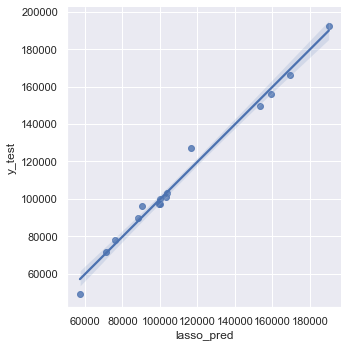

In [34]:
sns.set_theme(color_codes=True)
sns.lmplot(y='y_test',x='lasso_pred',data=eval_df)

**Residual Histogram**

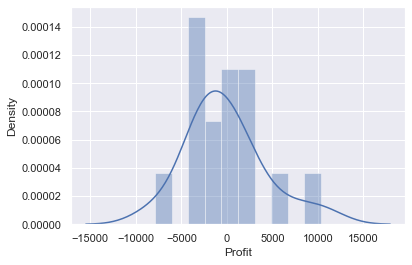

In [35]:
sns.distplot((y_test-lasso_pred),bins=10);